# WebScraping-Sephora: Step 4. Statistical Analysis
NYCDSA web scraping project

---
## Project Description
The goal of this project is to explore the color spectrum of the foundations and lipsticks given reviewer's dominant colors (hair color, eye color, and skin tone from Sephora's reviewer inputs) to see if particular features are strongly correlated between the purchased and liked foundation and lipstick colors.

Please see Readme.md for more information including the Repository layout.


### Project Outline
- Step 1. Scrape product URLs
- Step 2. Scrape product reviews
- Step 3. Load all data and explore data
- Step 4. Statistical analysis

---
### Step 4. Statistical Analysis
Linear regression and ANOVA were performed.

In [1]:
import glob
import pandas as pd
import numpy as np

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.multivariate.manova import MANOVA
from patsy.contrasts import Treatment
from sklearn.linear_model import LinearRegression

import seaborn as sns
from matplotlib import cm
from matplotlib import colors
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [29]:
# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [18]:
%store -r 'df'
%store -r 'skintone_colors'
%store -r 'skintones'
%store -r 'haircolor_colors'
%store -r 'haircolors'
%store -r 'eyecolor_colors'
%store -r 'eyecolors'

### Statistical Analysis - ANOVA & LM 
Luminosity ~ skintone + hair + eyecolors

In [4]:
# foundation
print('LM and ANOVA - Foundation Luminosity ~ skintone + hair + eyecolors')
model_lum_f = ols('Luminosity ~ 1 + C(Skintone,Treatment(reference=4)) + C(Haircolor,Treatment(reference=3)) + C(Eyecolor,Treatment(reference=1))', 
                  data = df[df.Category == 'foundation-makeup']).fit()
print(model_lum_f.summary())
print('\n')
aov_table_lum_f = sm.stats.anova_lm(model_lum_f, typ=2)
print(aov_table_lum_f)

LM and ANOVA - Foundation Luminosity ~ skintone + hair + eyecolors
                            OLS Regression Results                            
Dep. Variable:             Luminosity   R-squared:                       0.458
Model:                            OLS   Adj. R-squared:                  0.458
Method:                 Least Squares   F-statistic:                     5505.
Date:                Fri, 18 Dec 2020   Prob (F-statistic):               0.00
Time:                        22:33:27   Log-Likelihood:             1.2655e+05
No. Observations:              110548   AIC:                        -2.531e+05
Df Residuals:                  110530   BIC:                        -2.529e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

In [5]:
# lipstick
print('LM and ANOVA - Lipstick Luminosity ~ skintone + hair + eyecolors')
model_lum_l = ols('Luminosity ~ 1 + C(Skintone,Treatment(reference=4)) + C(Haircolor,Treatment(reference=3)) + C(Eyecolor,Treatment(reference=1))', data = df[df.Category == 'lipstick']).fit()
print(model_lum_l.summary())
print('\n')
aov_table_lum_l = sm.stats.anova_lm(model_lum_l, typ=2)
print(aov_table_lum_l)

LM and ANOVA - Lipstick Luminosity ~ skintone + hair + eyecolors
                            OLS Regression Results                            
Dep. Variable:             Luminosity   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     143.0
Date:                Fri, 18 Dec 2020   Prob (F-statistic):               0.00
Time:                        22:33:29   Log-Likelihood:                 35286.
No. Observations:               61722   AIC:                        -7.054e+04
Df Residuals:                   61704   BIC:                        -7.037e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

### Statistical analysis - MANOVA R G B
MANOVA - R + G + B ~ skintone + hair + eyecolors

In [6]:
# foundation
print('\n\nMANOVA - Foundation R + G + B ~ skintone + hair + eyecolors')
maov_lum_f = MANOVA.from_formula('R + G + B ~ 1 + Skintone + Haircolor + Eyecolor', data=df[df.Category == 'foundation-makeup'])
print(maov_lum_f.mv_test())
# everything is significant since there's so much data. Need to do linear regression to observerve more. 



MANOVA - Foundation R + G + B ~ skintone + hair + eyecolors
                     Multivariate linear model
                                                                   
-------------------------------------------------------------------
       Intercept        Value  Num DF    Den DF    F Value   Pr > F
-------------------------------------------------------------------
          Wilks' lambda 0.4040 3.0000 110528.0000 54347.4558 0.0000
         Pillai's trace 0.5960 3.0000 110528.0000 54347.4558 0.0000
 Hotelling-Lawley trace 1.4751 3.0000 110528.0000 54347.4558 0.0000
    Roy's greatest root 1.4751 3.0000 110528.0000 54347.4558 0.0000
-------------------------------------------------------------------
                                                                   
-------------------------------------------------------------------
        Skintone        Value   Num DF    Den DF    F Value  Pr > F
-------------------------------------------------------------------
       

## Statistical analysis - LM for R G B
R or G or B ~ skintone + hair + eyecolors

<b>Foundation</b>

In [7]:
print('LM and ANOVA - Foundation R ~ skintone + hair + eyecolors')
model_lum_f = ols('R ~ 1 + C(Skintone,Treatment(reference=4)) + C(Haircolor,Treatment(reference=3)) + C(Eyecolor,Treatment(reference=1))', 
                  data = df[df.Category == 'foundation-makeup']).fit()
print(model_lum_f.summary())

LM and ANOVA - Foundation R ~ skintone + hair + eyecolors
                            OLS Regression Results                            
Dep. Variable:                      R   R-squared:                       0.362
Model:                            OLS   Adj. R-squared:                  0.362
Method:                 Least Squares   F-statistic:                     3689.
Date:                Fri, 18 Dec 2020   Prob (F-statistic):               0.00
Time:                        22:33:37   Log-Likelihood:            -4.8250e+05
No. Observations:              110548   AIC:                         9.650e+05
Df Residuals:                  110530   BIC:                         9.652e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [8]:
print('LM and ANOVA - Foundation G ~ skintone + hair + eyecolors')
model_lum_f = ols('G ~ 1 + C(Skintone,Treatment(reference=4)) + C(Haircolor,Treatment(reference=3)) + C(Eyecolor,Treatment(reference=1))', 
                  data = df[df.Category == 'foundation-makeup']).fit()
print(model_lum_f.summary())

LM and ANOVA - Foundation G ~ skintone + hair + eyecolors
                            OLS Regression Results                            
Dep. Variable:                      G   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     5715.
Date:                Fri, 18 Dec 2020   Prob (F-statistic):               0.00
Time:                        22:33:40   Log-Likelihood:            -4.9137e+05
No. Observations:              110548   AIC:                         9.828e+05
Df Residuals:                  110530   BIC:                         9.830e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [9]:
print('LM and ANOVA - Foundation B ~ skintone + hair + eyecolors')
model_lum_f = ols('B ~ 1 + C(Skintone,Treatment(reference=4)) + C(Haircolor,Treatment(reference=3)) + C(Eyecolor,Treatment(reference=1))', 
                  data = df[df.Category == 'foundation-makeup']).fit()
print(model_lum_f.summary())

LM and ANOVA - Foundation B ~ skintone + hair + eyecolors
                            OLS Regression Results                            
Dep. Variable:                      B   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.467
Method:                 Least Squares   F-statistic:                     5701.
Date:                Fri, 18 Dec 2020   Prob (F-statistic):               0.00
Time:                        22:33:43   Log-Likelihood:            -5.0851e+05
No. Observations:              110548   AIC:                         1.017e+06
Df Residuals:                  110530   BIC:                         1.017e+06
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

<b>Lipstick</b>

In [10]:
print('LM and ANOVA - Lipstick R ~ skintone + hair + eyecolors')
model_lum_l = ols('R ~ 1 + C(Skintone,Treatment(reference=4)) + C(Haircolor,Treatment(reference=3)) + C(Eyecolor,Treatment(reference=1))', 
                  data = df[df.Category == 'lipstick']).fit()
print(model_lum_l.summary())

LM and ANOVA - Lipstick R ~ skintone + hair + eyecolors
                            OLS Regression Results                            
Dep. Variable:                      R   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     139.0
Date:                Fri, 18 Dec 2020   Prob (F-statistic):               0.00
Time:                        22:33:49   Log-Likelihood:            -3.1112e+05
No. Observations:               61722   AIC:                         6.223e+05
Df Residuals:                   61704   BIC:                         6.224e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [11]:
print('LM and ANOVA - Lipstick G ~ skintone + hair + eyecolors')
model_lum_l = ols('G ~ 1 + C(Skintone,Treatment(reference=4)) + C(Haircolor,Treatment(reference=3)) + C(Eyecolor,Treatment(reference=1))', 
                  data = df[df.Category == 'lipstick']).fit()
print(model_lum_l.summary())

LM and ANOVA - Lipstick G ~ skintone + hair + eyecolors
                            OLS Regression Results                            
Dep. Variable:                      G   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     103.7
Date:                Fri, 18 Dec 2020   Prob (F-statistic):               0.00
Time:                        22:33:51   Log-Likelihood:            -3.1736e+05
No. Observations:               61722   AIC:                         6.348e+05
Df Residuals:                   61704   BIC:                         6.349e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [12]:
print('LM and ANOVA - Lipstick B ~ skintone + hair + eyecolors')
model_lum_l = ols('B ~ 1 + C(Skintone,Treatment(reference=4)) + C(Haircolor,Treatment(reference=3)) + C(Eyecolor,Treatment(reference=1))', 
                  data = df[df.Category == 'lipstick']).fit()
print(model_lum_l.summary())

LM and ANOVA - Lipstick B ~ skintone + hair + eyecolors
                            OLS Regression Results                            
Dep. Variable:                      B   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     101.4
Date:                Fri, 18 Dec 2020   Prob (F-statistic):               0.00
Time:                        22:33:53   Log-Likelihood:            -3.1218e+05
No. Observations:               61722   AIC:                         6.244e+05
Df Residuals:                   61704   BIC:                         6.246e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

---
## Aggregate Analysis

### Luminosity

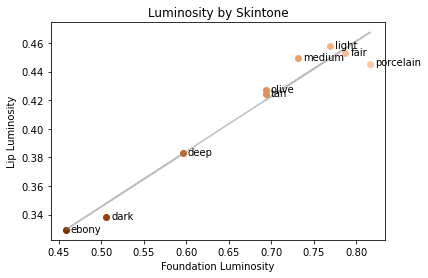

[0.38613813]
[0.15235066]
                            OLS Regression Results                            
Dep. Variable:             Luminosity   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     141.7
Date:                Fri, 18 Dec 2020   Prob (F-statistic):           6.71e-06
Time:                        22:40:15   Log-Likelihood:                 28.510
No. Observations:                   9   AIC:                            -53.02
Df Residuals:                       7   BIC:                            -52.63
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1524     

/Users/koeunlim/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  "anyway, n=%i" % int(n))


In [17]:
# Skintone
df_agg_f = df[df.Category == 'foundation-makeup'].groupby(by='Skintone').median()
df_agg_l = df[df.Category == 'lipstick'].groupby(by='Skintone').median()
x=df_agg_f.Luminosity
y=df_agg_l.Luminosity
lm = LinearRegression()
model_lum = lm.fit(np.array(x).reshape(-1, 1), np.array(y).reshape(-1, 1))

plt.title("Luminosity by Skintone")
plt.xlabel("Foundation Luminosity")
plt.ylabel("Lip Luminosity")
for i, txt in enumerate(df_agg_f.index.tolist()):
    plt.scatter(x[i],y[i],facecolors=skintone_colors[skintones.index(txt)])
    plt.annotate(txt, (x[i]+0.006, y[i]-0.0014))
plt.plot(x, lm.predict(np.array(x).reshape(-1, 1)), c='gray',alpha=0.5)
plt.show()
print(model_lum.coef_[0])
print(model_lum.intercept_)

x_add_const = sm.add_constant(np.array(x).reshape(-1,1))
model_lum_sm = sm.OLS(y,x_add_const).fit()
print(model_lum_sm.summary())

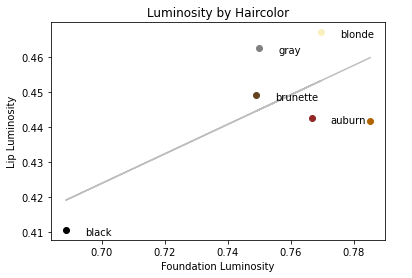

[0.41987734]
[0.13009697]
                            OLS Regression Results                            
Dep. Variable:             Luminosity   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.375
Method:                 Least Squares   F-statistic:                     4.000
Date:                Fri, 18 Dec 2020   Prob (F-statistic):              0.116
Time:                        22:42:50   Log-Likelihood:                 17.587
No. Observations:                   6   AIC:                            -31.17
Df Residuals:                       4   BIC:                            -31.59
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1301     

/Users/koeunlim/opt/anaconda3/lib/python3.7/site-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  "samples were given." % int(n), ValueWarning)


In [19]:
# Haircolor
df_agg_f = df[df.Category == 'foundation-makeup'].groupby(by='Haircolor').median()
df_agg_l = df[df.Category == 'lipstick'].groupby(by='Haircolor').median()
x=df_agg_f.Luminosity
y=df_agg_l.Luminosity
lm = LinearRegression()
model_lum = lm.fit(np.array(x).reshape(-1, 1), np.array(y).reshape(-1, 1))

plt.title("Luminosity by Haircolor")
plt.xlabel("Foundation Luminosity")
plt.ylabel("Lip Luminosity")
for i, txt in enumerate(df_agg_f.index.tolist()):
    plt.scatter(x[i],y[i],facecolors=haircolor_colors[haircolors.index(txt)])
    plt.annotate(txt, (x[i]+0.006, y[i]-0.0014))
plt.plot(x, lm.predict(np.array(x).reshape(-1, 1)), c='gray',alpha=0.5)
plt.show()
print(model_lum.coef_[0])
print(model_lum.intercept_)

x_add_const = sm.add_constant(np.array(x).reshape(-1,1))
model_lum_sm = sm.OLS(y,x_add_const).fit()
print(model_lum_sm.summary())

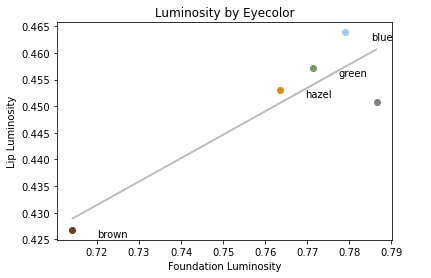

[0.44011631]
[0.11456246]
                            OLS Regression Results                            
Dep. Variable:             Luminosity   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     11.90
Date:                Fri, 18 Dec 2020   Prob (F-statistic):             0.0409
Time:                        22:43:47   Log-Likelihood:                 18.782
No. Observations:                   5   AIC:                            -33.56
Df Residuals:                       3   BIC:                            -34.34
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1146     

/Users/koeunlim/opt/anaconda3/lib/python3.7/site-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)


In [20]:
# Eyecolor
df_agg_f = df[df.Category == 'foundation-makeup'].groupby(by='Eyecolor').median()
df_agg_l = df[df.Category == 'lipstick'].groupby(by='Eyecolor').median()
x=df_agg_f.Luminosity
y=df_agg_l.Luminosity
lm = LinearRegression()
model_lum = lm.fit(np.array(x).reshape(-1, 1), np.array(y).reshape(-1, 1))

plt.title("Luminosity by Eyecolor")
plt.xlabel("Foundation Luminosity")
plt.ylabel("Lip Luminosity")
for i, txt in enumerate(df_agg_f.index.tolist()):
    plt.scatter(x[i],y[i],facecolors=eyecolor_colors[eyecolors.index(txt)])
    plt.annotate(txt, (x[i]+0.006, y[i]-0.0014))
plt.plot(x, lm.predict(np.array(x).reshape(-1, 1)), c='gray',alpha=0.5)
plt.show()
print(model_lum.coef_[0])
print(model_lum.intercept_)

x_add_const = sm.add_constant(np.array(x).reshape(-1,1))
model_lum_sm = sm.OLS(y,x_add_const).fit()
print(model_lum_sm.summary())

### RGB components

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


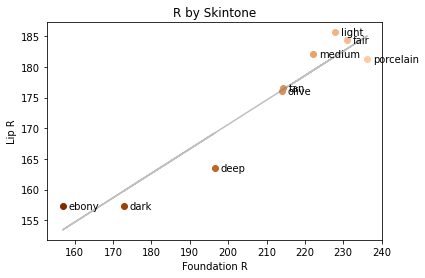

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


[0.39793355]
[91.02800975]
                            OLS Regression Results                            
Dep. Variable:                      R   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     71.22
Date:                Sat, 19 Dec 2020   Prob (F-statistic):           6.47e-05
Time:                        14:54:41   Log-Likelihood:                -23.287
No. Observations:                   9   AIC:                             50.57
Df Residuals:                       7   BIC:                             50.97
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         91.0280    

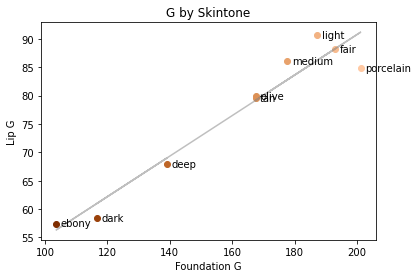

[0.35693449]
[19.36816365]
                            OLS Regression Results                            
Dep. Variable:                      G   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     105.6
Date:                Sat, 19 Dec 2020   Prob (F-statistic):           1.79e-05
Time:                        14:54:42   Log-Likelihood:                -22.565
No. Observations:                   9   AIC:                             49.13
Df Residuals:                       7   BIC:                             49.53
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.3682    

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


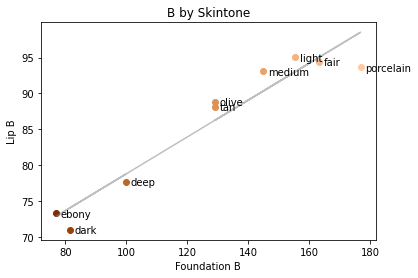

[0.25616519]
[53.22301374]
                            OLS Regression Results                            
Dep. Variable:                      B   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     83.45
Date:                Sat, 19 Dec 2020   Prob (F-statistic):           3.87e-05
Time:                        14:54:43   Log-Likelihood:                -21.027
No. Observations:                   9   AIC:                             46.05
Df Residuals:                       7   BIC:                             46.45
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         53.2230    

In [32]:
## Skintone
df_agg_f = df[df.Category == 'foundation-makeup'].groupby(by='Skintone').median()
df_agg_l = df[df.Category == 'lipstick'].groupby(by='Skintone').median()
x=df_agg_f.R
y=df_agg_l.R
model_lum = lm.fit(np.array(x).reshape(-1, 1), np.array(y).reshape(-1, 1))

# R
plt.title("R by Skintone")
plt.xlabel("Foundation R")
plt.ylabel("Lip R")
for i, txt in enumerate(df_agg_f.index.tolist()):
    plt.scatter(x[i],y[i],facecolors=skintone_colors[skintones.index(txt)])
    plt.annotate(txt, (x[i]+1.5, y[i]-0.5))
plt.plot(x, lm.predict(np.array(x).reshape(-1, 1)), c='gray',alpha=0.5)
plt.savefig('figures/LM_R_skintone.eps')
plt.savefig('figures/LM_R_skintone.png')
plt.show()
print(model_lum.coef_[0])
print(model_lum.intercept_)

x_add_const = sm.add_constant(np.array(x).reshape(-1,1))
model_lum_sm = sm.OLS(y,x_add_const).fit()
print(model_lum_sm.summary())

#G
x=df_agg_f.G
y=df_agg_l.G
model_lum = lm.fit(np.array(x).reshape(-1, 1), np.array(y).reshape(-1, 1))

plt.figure()
plt.title("G by Skintone")
plt.xlabel("Foundation G")
plt.ylabel("Lip G")
for i, txt in enumerate(df_agg_f.index.tolist()):
    plt.scatter(x[i],y[i],facecolors=skintone_colors[skintones.index(txt)])
    plt.annotate(txt, (x[i]+1.5, y[i]-0.5))
plt.plot(x, lm.predict(np.array(x).reshape(-1, 1)), c='gray',alpha=0.5)
plt.savefig('figures/LM_G_skintone.eps')
plt.savefig('figures/LM_G_skintone.png')
plt.show()
print(model_lum.coef_[0])
print(model_lum.intercept_)

x_add_const = sm.add_constant(np.array(x).reshape(-1,1))
model_lum_sm = sm.OLS(y,x_add_const).fit()
print(model_lum_sm.summary())

#B
x=df_agg_f.B
y=df_agg_l.B
model_lum = lm.fit(np.array(x).reshape(-1, 1), np.array(y).reshape(-1, 1))

plt.figure()
plt.title("B by Skintone")
plt.xlabel("Foundation B")
plt.ylabel("Lip B")
for i, txt in enumerate(df_agg_f.index.tolist()):
    plt.scatter(x[i],y[i],facecolors=skintone_colors[skintones.index(txt)])
    plt.annotate(txt, (x[i]+1.5, y[i]-0.5))
plt.plot(x, lm.predict(np.array(x).reshape(-1, 1)), c='gray',alpha=0.5)
plt.savefig('figures/LM_B_skintone.eps')
plt.savefig('figures/LM_B_skintone.png')
plt.show()
print(model_lum.coef_[0])
print(model_lum.intercept_)

x_add_const = sm.add_constant(np.array(x).reshape(-1,1))
model_lum_sm = sm.OLS(y,x_add_const).fit()
print(model_lum_sm.summary())

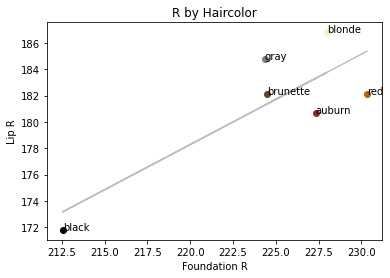

[0.68741806]
[27.04908711]
                            OLS Regression Results                            
Dep. Variable:                      R   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     8.961
Date:                Fri, 18 Dec 2020   Prob (F-statistic):             0.0402
Time:                        22:56:56   Log-Likelihood:                -14.319
No. Observations:                   6   AIC:                             32.64
Df Residuals:                       4   BIC:                             32.22
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         27.0491    

/Users/koeunlim/opt/anaconda3/lib/python3.7/site-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  "samples were given." % int(n), ValueWarning)


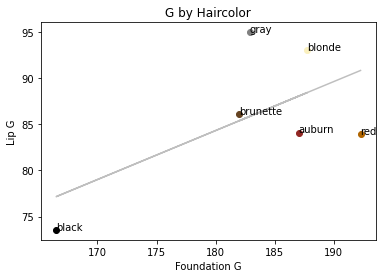

[0.53015348]
[-11.10639691]
                            OLS Regression Results                            
Dep. Variable:                      G   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.229
Method:                 Least Squares   F-statistic:                     2.483
Date:                Fri, 18 Dec 2020   Prob (F-statistic):              0.190
Time:                        22:56:56   Log-Likelihood:                -18.722
No. Observations:                   6   AIC:                             41.44
Df Residuals:                       4   BIC:                             41.03
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.1064   

/Users/koeunlim/opt/anaconda3/lib/python3.7/site-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  "samples were given." % int(n), ValueWarning)


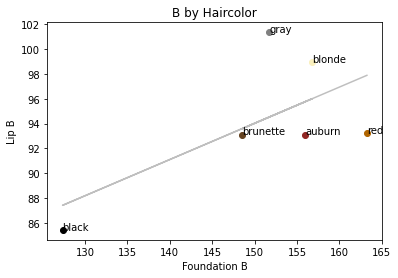

[0.29200629]
[50.22033198]
                            OLS Regression Results                            
Dep. Variable:                      B   R-squared:                       0.428
Model:                            OLS   Adj. R-squared:                  0.285
Method:                 Least Squares   F-statistic:                     2.989
Date:                Fri, 18 Dec 2020   Prob (F-statistic):              0.159
Time:                        22:56:56   Log-Likelihood:                -16.581
No. Observations:                   6   AIC:                             37.16
Df Residuals:                       4   BIC:                             36.75
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         50.2203    

/Users/koeunlim/opt/anaconda3/lib/python3.7/site-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  "samples were given." % int(n), ValueWarning)


In [26]:
## Haircolor
# R
df_agg_f = df[df.Category == 'foundation-makeup'].groupby(by='Haircolor').median()
df_agg_l = df[df.Category == 'lipstick'].groupby(by='Haircolor').median()
x=df_agg_f.R
y=df_agg_l.R
model_lum = lm.fit(np.array(x).reshape(-1, 1), np.array(y).reshape(-1, 1))

plt.title("R by Haircolor")
plt.xlabel("Foundation R")
plt.ylabel("Lip R")
for i, txt in enumerate(df_agg_f.index.tolist()):
    plt.scatter(x[i],y[i],facecolors=haircolor_colors[haircolors.index(txt)])
    plt.annotate(txt, (x[i]+0.006, y[i]-0.0014))
plt.plot(x, lm.predict(np.array(x).reshape(-1, 1)), c='gray',alpha=0.5)
plt.show()
print(model_lum.coef_[0])
print(model_lum.intercept_)

x_add_const = sm.add_constant(np.array(x).reshape(-1,1))
model_lum_sm = sm.OLS(y,x_add_const).fit()
print(model_lum_sm.summary())

# G
x=df_agg_f.G
y=df_agg_l.G
model_lum = lm.fit(np.array(x).reshape(-1, 1), np.array(y).reshape(-1, 1))

plt.figure()
plt.title("G by Haircolor")
plt.xlabel("Foundation G")
plt.ylabel("Lip G")
for i, txt in enumerate(df_agg_f.index.tolist()):
    plt.scatter(x[i],y[i],facecolors=haircolor_colors[haircolors.index(txt)])
    plt.annotate(txt, (x[i]+0.006, y[i]-0.0014))
plt.plot(x, lm.predict(np.array(x).reshape(-1, 1)), c='gray',alpha=0.5)
plt.show()
print(model_lum.coef_[0])
print(model_lum.intercept_)

x_add_const = sm.add_constant(np.array(x).reshape(-1,1))
model_lum_sm = sm.OLS(y,x_add_const).fit()
print(model_lum_sm.summary())

# B
x=df_agg_f.B
y=df_agg_l.B
model_lum = lm.fit(np.array(x).reshape(-1, 1), np.array(y).reshape(-1, 1))

plt.figure()
plt.title("B by Haircolor")
plt.xlabel("Foundation B")
plt.ylabel("Lip B")
for i, txt in enumerate(df_agg_f.index.tolist()):
    plt.scatter(x[i],y[i],facecolors=haircolor_colors[haircolors.index(txt)])
    plt.annotate(txt, (x[i]+0.006, y[i]-0.0014))
plt.plot(x, lm.predict(np.array(x).reshape(-1, 1)), c='gray',alpha=0.5)
plt.show()
print(model_lum.coef_[0])
print(model_lum.intercept_)

x_add_const = sm.add_constant(np.array(x).reshape(-1,1))
model_lum_sm = sm.OLS(y,x_add_const).fit()
print(model_lum_sm.summary())

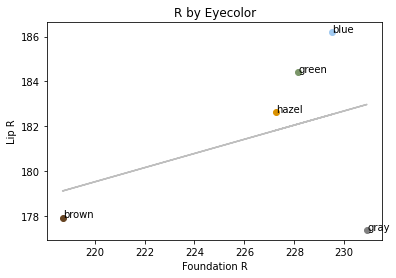

[0.315966]
[110.01890045]
                            OLS Regression Results                            
Dep. Variable:                      R   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                 -0.134
Method:                 Least Squares   F-statistic:                    0.5272
Date:                Fri, 18 Dec 2020   Prob (F-statistic):              0.520
Time:                        22:58:19   Log-Likelihood:                -12.949
No. Observations:                   5   AIC:                             29.90
Df Residuals:                       3   BIC:                             29.12
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        110.0189     

/Users/koeunlim/opt/anaconda3/lib/python3.7/site-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)


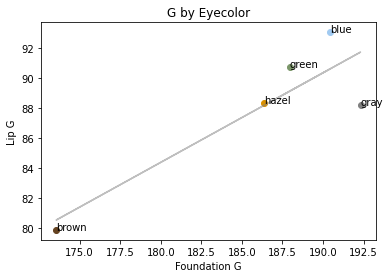

[0.59442702]
[-22.60726954]
                            OLS Regression Results                            
Dep. Variable:                      G   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     10.92
Date:                Fri, 18 Dec 2020   Prob (F-statistic):             0.0456
Time:                        22:58:19   Log-Likelihood:                -10.706
No. Observations:                   5   AIC:                             25.41
Df Residuals:                       3   BIC:                             24.63
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -22.6073   

/Users/koeunlim/opt/anaconda3/lib/python3.7/site-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)


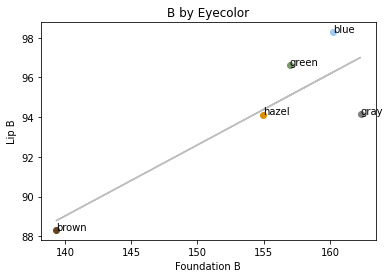

[0.35812875]
[38.88499974]
                            OLS Regression Results                            
Dep. Variable:                      B   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     8.616
Date:                Fri, 18 Dec 2020   Prob (F-statistic):             0.0607
Time:                        22:58:19   Log-Likelihood:                -9.7952
No. Observations:                   5   AIC:                             23.59
Df Residuals:                       3   BIC:                             22.81
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         38.8850    

/Users/koeunlim/opt/anaconda3/lib/python3.7/site-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)


In [27]:
# Eyecolor
df_agg_f = df[df.Category == 'foundation-makeup'].groupby(by='Eyecolor').median()
df_agg_l = df[df.Category == 'lipstick'].groupby(by='Eyecolor').median()

#R
x=df_agg_f.R
y=df_agg_l.R
model_lum = lm.fit(np.array(x).reshape(-1, 1), np.array(y).reshape(-1, 1))

plt.title("R by Eyecolor")
plt.xlabel("Foundation R")
plt.ylabel("Lip R")
for i, txt in enumerate(df_agg_f.index.tolist()):
    plt.scatter(x[i],y[i],facecolors=eyecolor_colors[eyecolors.index(txt)])
    plt.annotate(txt, (x[i]+0.006, y[i]-0.0014))
plt.plot(x, lm.predict(np.array(x).reshape(-1, 1)), c='gray',alpha=0.5)
plt.show()
print(model_lum.coef_[0])
print(model_lum.intercept_)

x_add_const = sm.add_constant(np.array(x).reshape(-1,1))
model_lum_sm = sm.OLS(y,x_add_const).fit()
print(model_lum_sm.summary())

#G
x=df_agg_f.G
y=df_agg_l.G
model_lum = lm.fit(np.array(x).reshape(-1, 1), np.array(y).reshape(-1, 1))

plt.figure()
plt.title("G by Eyecolor")
plt.xlabel("Foundation G")
plt.ylabel("Lip G")
for i, txt in enumerate(df_agg_f.index.tolist()):
    plt.scatter(x[i],y[i],facecolors=eyecolor_colors[eyecolors.index(txt)])
    plt.annotate(txt, (x[i]+0.006, y[i]-0.0014))
plt.plot(x, lm.predict(np.array(x).reshape(-1, 1)), c='gray',alpha=0.5)
plt.show()
print(model_lum.coef_[0])
print(model_lum.intercept_)

x_add_const = sm.add_constant(np.array(x).reshape(-1,1))
model_lum_sm = sm.OLS(y,x_add_const).fit()
print(model_lum_sm.summary())

#B
x=df_agg_f.B
y=df_agg_l.B
model_lum = lm.fit(np.array(x).reshape(-1, 1), np.array(y).reshape(-1, 1))

plt.figure()
plt.title("B by Eyecolor")
plt.xlabel("Foundation B")
plt.ylabel("Lip B")
for i, txt in enumerate(df_agg_f.index.tolist()):
    plt.scatter(x[i],y[i],facecolors=eyecolor_colors[eyecolors.index(txt)])
    plt.annotate(txt, (x[i]+0.006, y[i]-0.0014))
plt.plot(x, lm.predict(np.array(x).reshape(-1, 1)), c='gray',alpha=0.5)
plt.show()
print(model_lum.coef_[0])
print(model_lum.intercept_)

x_add_const = sm.add_constant(np.array(x).reshape(-1,1))
model_lum_sm = sm.OLS(y,x_add_const).fit()
print(model_lum_sm.summary())